<a href="https://colab.research.google.com/github/anshmehta337/deep-learning/blob/main/day4diabetesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import files
u=files.upload()

Saving diabetes.csv to diabetes (3).csv


In [89]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader


df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)


In [90]:
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.act1 = nn.LeakyReLU(0.3)
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Linear(32, 16)
        self.act2 = nn.LeakyReLU(0.1)
        self.out = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.dropout(x)
        x = self.act2(self.fc2(x))
        x = self.sigmoid(self.out(x))
        return x



In [91]:
model = DiabetesModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 0.6546
Epoch [20/100], Loss: 0.5552
Epoch [30/100], Loss: 0.5776
Epoch [40/100], Loss: 0.2456
Epoch [50/100], Loss: 0.4142
Epoch [60/100], Loss: 0.4417
Epoch [70/100], Loss: 0.3117
Epoch [80/100], Loss: 0.3139
Epoch [90/100], Loss: 0.3128
Epoch [100/100], Loss: 0.1512


In [92]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
    print(" Accuracy:", accuracy)


 Accuracy: 0.7662337662337663


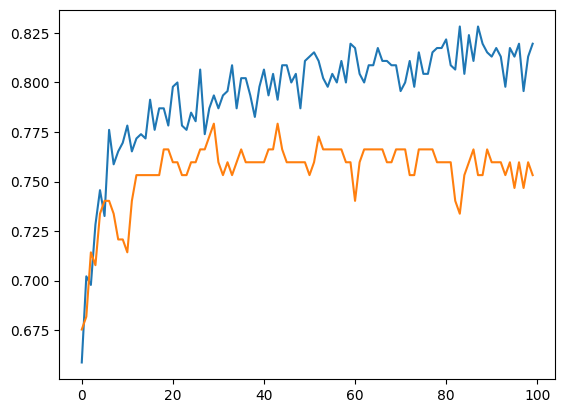

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])